In [1]:
import numpy as np
from scipy.stats import betabinom
import matplotlib.pyplot as plt

In [2]:
N, alpha, beta = 50_000, 1, 1

#calculate prior 
k_values = np.arange(0, N + 1)
k_prior = betabinom.pmf(k_values, N, alpha, beta)

In [3]:
# sample
n, x = 5000, 2500

# calculate posterior
posterior_k_values = np.arange(x, N - n + x + 1)
# or write np.arange(0, N-n+1)
posterior_k_minus_x_values = posterior_k_values - x
k_posterior = betabinom.pmf(posterior_k_minus_x_values, N - n, alpha + x, beta + n - x)

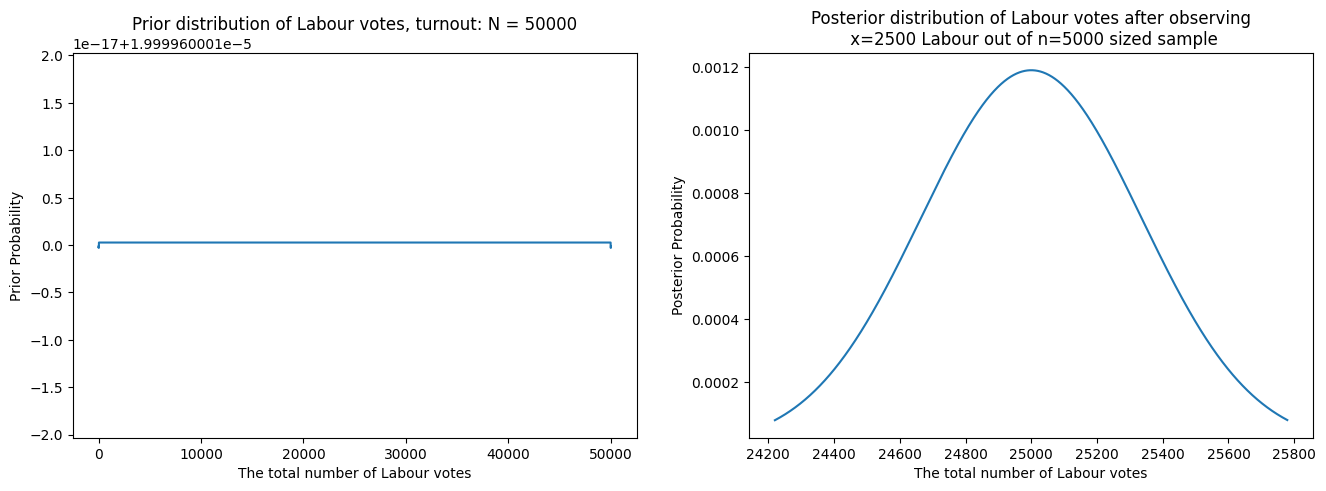

In [4]:
# plot prior
fig, ax = plt.subplots(1, 2, figsize=(16,5))
ax[0].plot(k_values, k_prior, ms=2, label="betabinom pmf")
ax[0].set_title(
    f"Prior distribution of Labour votes, turnout: N = {N}"
)
ax[0].set_xlabel("The total number of Labour votes")
ax[0].set_ylabel("Prior Probability")

# plot posterior

# lets remove 0.1 percent of mass on either end
tail_area = 1e-2
n_lower = int(betabinom.ppf(tail_area, N - n, alpha + x, beta + n - x))
n_upper = int(betabinom.ppf(1 - tail_area, N - n, alpha + x, beta + n - x))
# n_lower = 0
# n_upper = N

ax[1].plot(
    posterior_k_values[n_lower:n_upper], k_posterior[n_lower:n_upper], ms=2, label="betabinom pmf"
)
ax[1].set_title(f"Posterior distribution of Labour votes after observing\n x={x} Labour out of n={n} sized sample")
ax[1].set_xlabel("The total number of Labour votes")
ax[1].set_ylabel("Posterior Probability")

plt.show()